In [2]:
from torch import nn
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor, ModelCheckpoint
from model import DAE_KAN_Attention
from histopathology_dataset import *
import wandb

In [2]:
!cd ../../.. && pwd

/home/dzakirm/Research/Histopathology/histopathology


In [3]:

from torch.utils.data import DataLoader
image_path = "../../../data/processed/"
train_ds = ImageDataset(*create_dataset('train', image_path), 'cuda')
test_ds = ImageDataset(*create_dataset('test', image_path), 'cuda')

train_dl = DataLoader(train_ds, batch_size=12, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=12, shuffle=True)


../../../data/processed/train.csv
../../../data/processed/test.csv


In [4]:
x, y = next(iter(train_dl))
print(f"Shape of train input: {x.shape}, Shape of train output: {y.shape}")
xT, yT = next(iter(test_dl))
print(f"Shape of test input: {x.shape}, Shape of test output: {y.shape}")

Shape of train input: torch.Size([12, 3, 128, 128]), Shape of train output: torch.Size([12])
Shape of test input: torch.Size([12, 3, 128, 128]), Shape of test output: torch.Size([12])


In [5]:
from matplotlib import pyplot as plt
import torchvision.transforms.functional as F

plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])



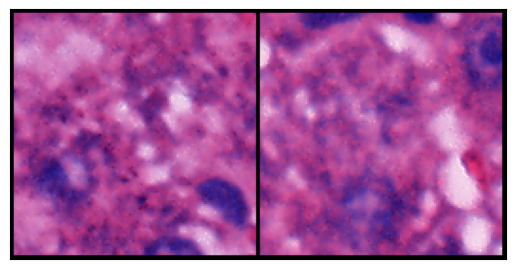

In [6]:

from torchvision.utils import make_grid
from torchvision.io import read_image

grid = make_grid(xT[6:8])
show(grid)


In [7]:
from pl_training import MyModel
loadedM = MyModel.load_from_checkpoint("../../../histo-dae/d8mmjonm/checkpoints/epoch=29-step=24415.ckpt")
output = loadedM(xT)[1]

In [8]:
output.shape

torch.Size([12, 3, 128, 128])

In [9]:
from torch import Tensor

outCPU = Tensor.cpu(output).detach()

In [10]:
outCPU.shape

torch.Size([12, 3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.17894322..1.0005198].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.22645009..1.0564666].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10091725..1.0138034].


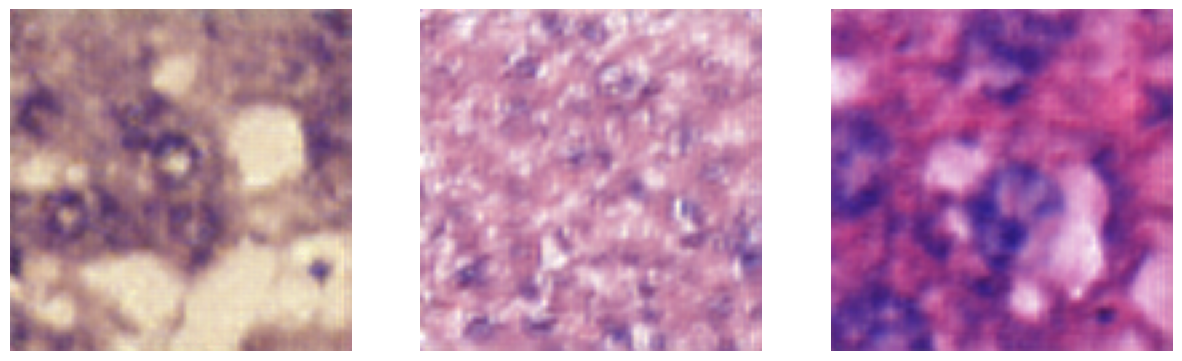

In [11]:
def show_images(batch, num_images=3):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = batch[i].permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# Visualize the images"
show_images(outCPU)

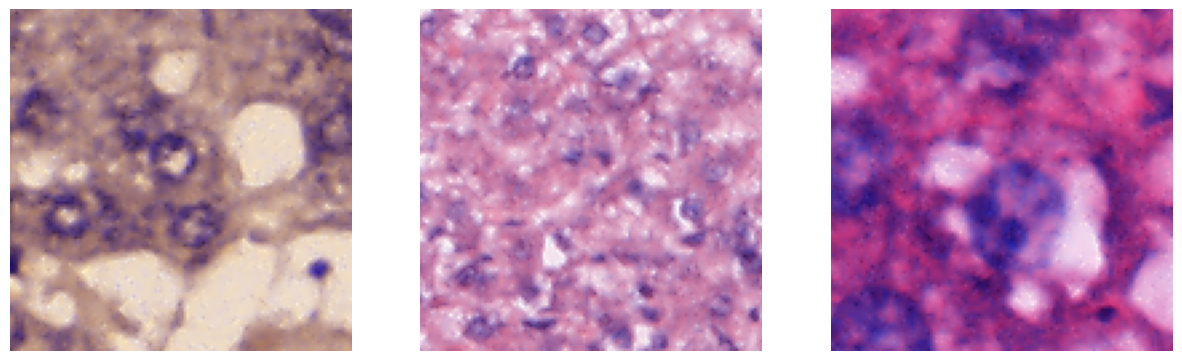

In [12]:
show_images(Tensor.cpu(xT))

In [4]:
# dft = pd.read_csv('../../../data/processed/DAE_Embeddings.csv')

In [5]:
# dft.head().

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,2.042096,0.844845,0.945657,0.141996,0.491849,1.406235,0.625911,0.790467,1.956100,0.497904,...,-1.405175,-1.396491,-1.425237,-1.385723,-1.419792,-1.408767,-1.360633,-1.251553,-1.309457,3
1,2.897375,1.356133,0.150996,1.242282,2.002972,0.392768,0.570139,1.417501,0.593235,-0.230377,...,-1.480208,-1.402386,-1.463990,-1.380736,-1.348446,-1.320432,-1.461964,-1.400106,-1.454484,3
2,2.668452,1.419168,1.042515,0.772741,1.430159,0.579188,0.566224,0.380447,0.937239,1.019865,...,-1.435013,-1.312848,-1.291617,-1.385330,-1.310063,-1.279431,-1.341355,-1.334085,-1.438274,3
3,1.524414,1.113103,1.172065,1.661154,0.149571,0.765854,1.115183,0.413136,1.499619,0.890102,...,-1.347889,-1.062157,-1.318599,-1.398939,-1.244598,-1.308311,-1.419487,-1.343312,-1.226037,3
4,2.856233,0.923580,0.214644,0.925724,1.800701,0.614332,1.286593,0.374759,0.422160,0.523560,...,-1.319947,-1.263641,-1.361590,-1.272291,-1.408589,-1.449019,-1.299335,-1.251545,-1.298388,3


In [14]:
# label = pd.read_csv('../../../data/processed/OHEheparfix.csv')['classes']

In [15]:
# dftr['label'] = label.values

In [16]:
# dftr.to_csv('DAE_Embeddings.csv', index=False)

In [17]:
# dftr.he

In [18]:
# set(train_ds.y.tolist())

In [19]:
# dftr['label'] =